# Plot Tangent line to curve
$f(x) = 3x^2-4x$

In [18]:
%matplotlib inline

x:  1 y:  2.0 slope:  2.0 y intercept:  -3.0 [0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
ret:  [-3.         -2.55555556 -2.11111111 -1.66666667 -1.22222222 -0.77777778
 -0.33333333  0.11111111  0.55555556  1.        ]


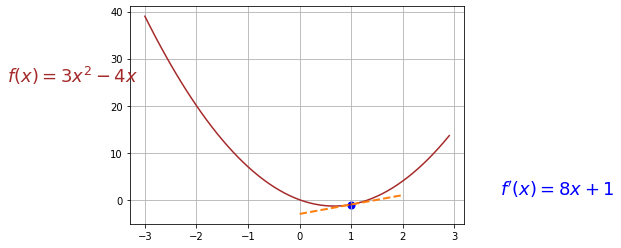

In [45]:
# importing modules
import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
  
# method to return function
def function(x):
    return 3 * x ** 2 - 4 * x
  
# method to return its derivative
def deriv(x):
    return derivative(function, x)

def TangentLine(x, x1, y1, d1, t_b):
    # y = mx + b
    ret = (d1*x) + t_b
    print("ret: ", ret)
    return ret
  
#range in x-axis
x = np.arange(-3, 3, 0.1)
  
# plot the primary function
y = function(x)
plt.plot(x, y, color='brown', label='Function')

#Get the tangent line equasion parts y=mx+b
t_x = 1
t_y =function(t_x)
t_slope = deriv(t_x)
t_b = t_y - (t_slope * t_x)
# Define x data range for tangent line
xrange = np.linspace(t_x - 1, t_x + 1, 10)

print("x: ", t_x, "y: ", t_slope, "slope: ", t_m, "y intercept: ", t_b, xrange)



plt.scatter(t_x, t_y, color='blue', s=50)
plt.plot(xrange, TangentLine(xrange, t_x, t_y, t_slope, t_b), 'C1--', linewidth = 2)

# plotting text in the graph
#plt.text(5.0, 1.0, r"$f'(x)=8x+1$", horizontalalignment='center', fontsize=18, color='blue')
  
plt.text(-4.4, 25.0, r'$f(x)=3x^2-4x$', horizontalalignment='center',
         fontsize=18, color='brown')
plt.grid(True)